In [ ]:
# imports for stock reader
import pandas_datareader.data as web
import os
from dotenv import load_dotenv
import pandas as pd

# Graphing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Preparing and Training the model
import numpy as np
import tensorflow as tf

Error: Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 1

In [ ]:
BASEDIR = os.path.join(os.getcwd(), '..')
load_dotenv(os.path.join(BASEDIR, '.env'))

Error: Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 1

In [3]:
start_date = '2017-04-04'
end_date = '2018-04-04'
name = 'AMZN'

In [4]:
# Reading the data
df = web.DataReader(name=name, data_source='quandl', start=start_date, end=end_date, access_key=os.getenv("quandle_key"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'access_key' keyword is deprecated, use 'api_key' instead
  


In [5]:
df

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,1572.40,1575.9600,1482.3200,1497.05,6793279.0,0.0,1.0,1572.40,1575.9600,1482.3200,1497.05,6793279.0
2018-03-26,1530.00,1556.9900,1499.2500,1555.86,5547618.0,0.0,1.0,1530.00,1556.9900,1499.2500,1555.86,5547618.0
2018-03-23,1539.01,1549.0200,1495.3600,1495.56,7843966.0,0.0,1.0,1539.01,1549.0200,1495.3600,1495.56,7843966.0
2018-03-22,1565.47,1573.8500,1542.4000,1544.10,6177737.0,0.0,1.0,1565.47,1573.8500,1542.4000,1544.10,6177737.0
2018-03-21,1586.45,1590.0000,1563.1700,1581.86,4667291.0,0.0,1.0,1586.45,1590.0000,1563.1700,1581.86,4667291.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-10,899.63,908.5100,899.0000,907.04,3184301.0,0.0,1.0,899.63,908.5100,899.0000,907.04,3184301.0
2017-04-07,899.65,900.0900,889.3100,894.88,3707367.0,0.0,1.0,899.65,900.0900,889.3100,894.88,3707367.0
2017-04-06,913.80,917.1899,894.4927,898.28,6344065.0,0.0,1.0,913.80,917.1899,894.4927,898.28,6344065.0


In [6]:
# Adding average column
df['mid_data'] = (df['High']+df['Low'])/2

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


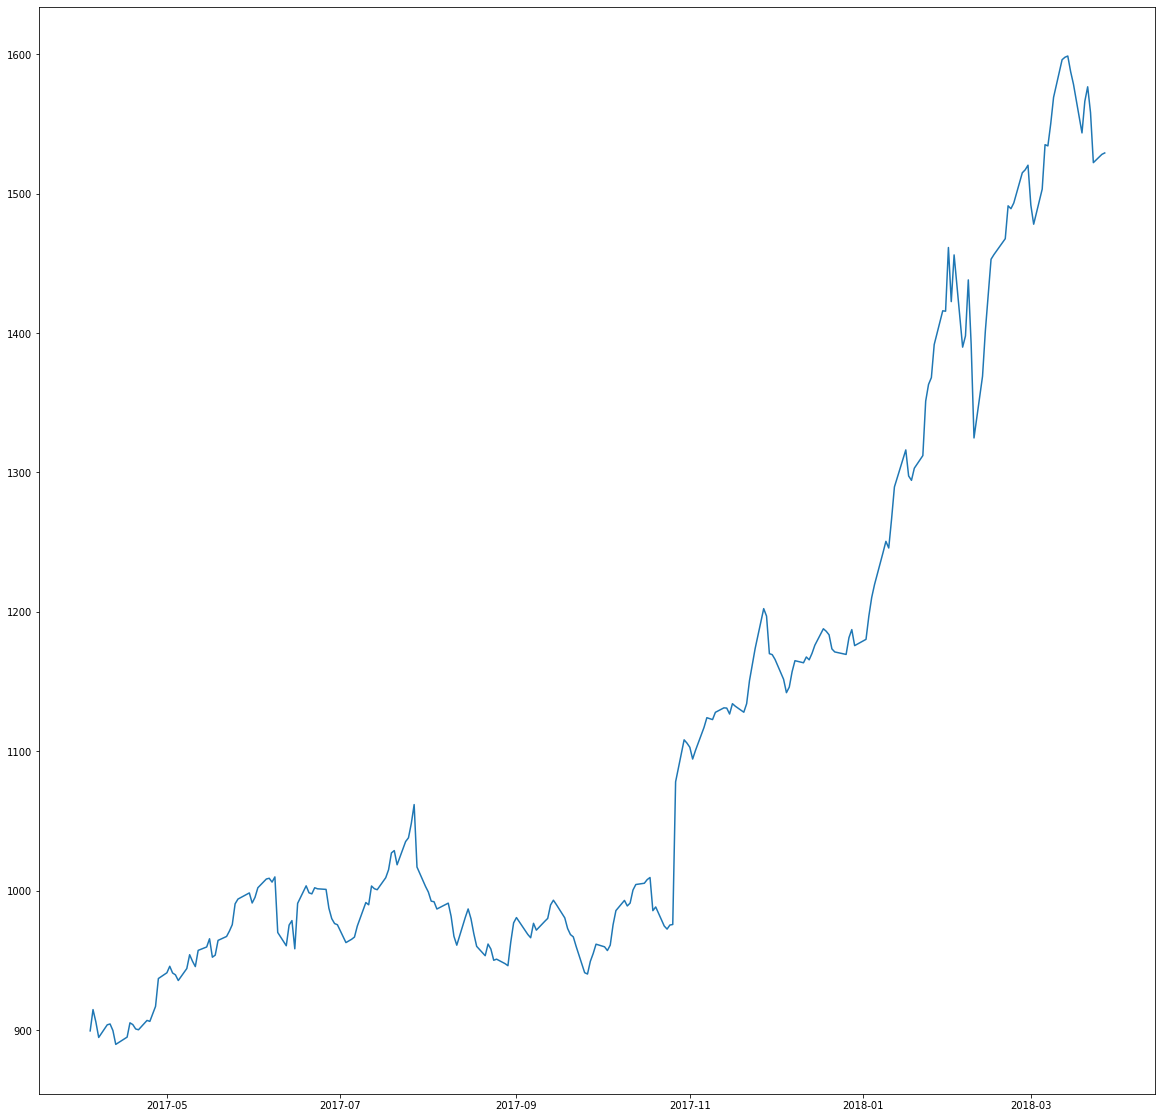

In [7]:
plt.figure(figsize=(20, 20))
plt.plot(df.index, df['mid_data'])

In [8]:
df_train = pd.DataFrame()
df_train['Data'] = df['mid_data'].values[::-1]
y_vals = df_train['Data'].values

In [9]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    '''
    This returns the window of time for a model to train on
    :param: dataset list/matrix : the dataset for the model to train on 
    :param: start_index int : Where is inside data do you want to start creating windows
    :param: end_index int : Where do you want to end creating windows
    :param: history_size int : the size of the past window of information
    :param: target_size int: How far into the future the model needs to learn
    '''
    
    data = [] # Stores the data for the training window
    labels = [] # Stores the data for the output

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [10]:
TRAIN_SPLIT = 210
tf.random.set_seed(13)

In [11]:
# Normalizing the data
y_vals_mean = y_vals[:TRAIN_SPLIT].mean()
y_vals_std = y_vals[:TRAIN_SPLIT].std()

y_vals_norm = (y_vals - y_vals_mean)/y_vals_std

In [12]:
univariate_past_history = 20
univariate_future_target = 0

# Training
x_train_uni, y_train_uni = univariate_data(y_vals_norm, 0, TRAIN_SPLIT, # Data, start_index, end_index
                                           univariate_past_history,  # History_size
                                           univariate_future_target) # Target_size, the next timestep

# Testing
x_val_uni, y_val_uni = univariate_data(y_vals_norm, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [13]:
x_train_uni.shape

(190, 20, 1)

In [14]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target stock to predict')
print (y_train_uni[0])

Single window of past history
[[-1.15828736]
 [-1.03880368]
 [-1.10792755]
 [-1.19515781]
 [-1.12426214]
 [-1.11944703]
 [-1.15624505]
 [-1.23407018]
 [-1.19327875]
 [-1.11298773]
 [-1.12285675]
 [-1.14735902]
 [-1.15201754]
 [-1.09959937]
 [-1.10480595]
 [-1.06241339]
 [-1.0206785 ]
 [-0.86427153]
 [-0.8318713 ]
 [-0.79541346]]

 Target stock to predict
-0.8330457188363215


In [15]:
def create_time_steps(length):
    '''
    returns an array of numbers from -length to -1. i.e: create_timesteps(5) --> [-5, -4, -3, -2, -1]
    :param: length int: size of the timestep
    '''
    time_steps = []
    for i in range(-length, 0, 1):
        time_steps.append(i)
    return time_steps

In [16]:
def show_plot(plot_data, delta, title):
    '''
     - Plots the target data (y) with the time steps (X).
     - If the size of plot_data list is bigger than 1, i.e 3, the 0th index is the history (acctual data)
         the 1st index is the True future given by univariate function
         the 2nd index is the model prediction
    :params: plot_data dataframe/series: the data to plot
    :params: delta int: how fare into the future to move
    :params: title string: the title of the plot
    :returns: A plot of plot_data
    '''
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                   label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

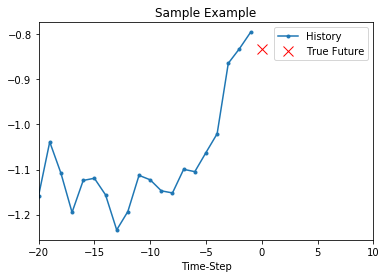

In [17]:
# Example for show_plot function
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

# Creating the model

In [29]:
# using tf.data to shuffle, batch, and cache the dataset.

BATCH_SIZE = 10
BUFFER_SIZE = 20

# Creating training slices and shuffling them
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# Creating testing slices and shuffling them
val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [30]:
# Building the model
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])
#
simple_lstm_model.compile(optimizer='adam', loss='mae')

In [31]:
# Training the model
EVALUATION_INTERVAL = 5
EPOCHS = 100

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/100
5/5 [==============================] - 1s 194ms/step - loss: 0.4214 - val_loss: 3.9447
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 0.4438 - val_loss: 3.9329
Epoch 3/100
5/5 [==============================] - 0s 28ms/step - loss: 0.5544 - val_loss: 3.9058
Epoch 4/100
5/5 [==============================] - 0s 26ms/step - loss: 1.2113 - val_loss: 3.8217
Epoch 5/100
5/5 [==============================] - 0s 27ms/step - loss: 0.2300 - val_loss: 3.7550
Epoch 6/100
5/5 [==============================] - 0s 27ms/step - loss: 0.2780 - val_loss: 3.7107
Epoch 7/100
5/5 [==============================] - 0s 27ms/step - loss: 0.5904 - val_loss: 3.6653
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 0.8601 - val_loss: 3.5841
Epoch 9/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1765 - val_loss: 3.5233
Epoch 10/100
5/5 [==============================] - 0s 27ms/step - loss: 0.2056 - val_loss: 3.4818
Epoch 11/100
5/5 [

Epoch 84/100
5/5 [==============================] - 0s 25ms/step - loss: 0.2919 - val_loss: 1.7490
Epoch 85/100
5/5 [==============================] - 0s 34ms/step - loss: 0.1152 - val_loss: 1.7237
Epoch 86/100
5/5 [==============================] - 0s 32ms/step - loss: 0.1451 - val_loss: 1.7081
Epoch 87/100
5/5 [==============================] - 0s 27ms/step - loss: 0.1759 - val_loss: 1.7050
Epoch 88/100
5/5 [==============================] - 0s 24ms/step - loss: 0.2136 - val_loss: 1.6706
Epoch 89/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1069 - val_loss: 1.6477
Epoch 90/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1389 - val_loss: 1.6333
Epoch 91/100
5/5 [==============================] - 0s 26ms/step - loss: 0.2387 - val_loss: 1.6199
Epoch 92/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1269 - val_loss: 1.5847
Epoch 93/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1119 - val_loss: 1.5643
Epoch 94/1

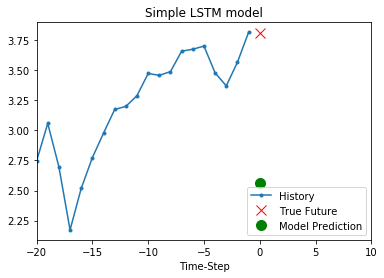

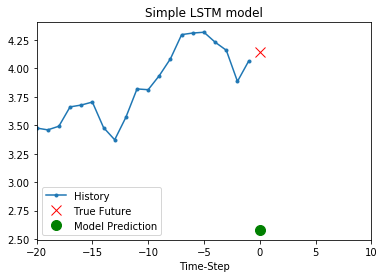

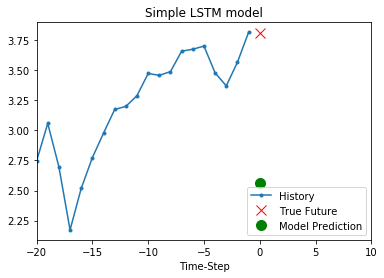

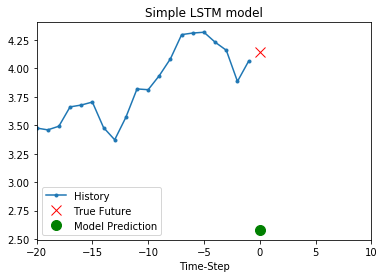

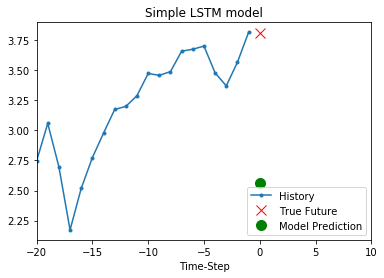

In [33]:
# Predictions on the model

# plt.figure(figsize=(20,20))
for x, y in val_univariate.take(5):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [34]:
# Conclusions the model works but all of the predictions are horrably off
# 1. Research about how to get more data from quandle
# 2. Research what Batch_size, Buffer_size and evaluation interval accomplish
# 3. Tweak the numbers to get the best results